In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


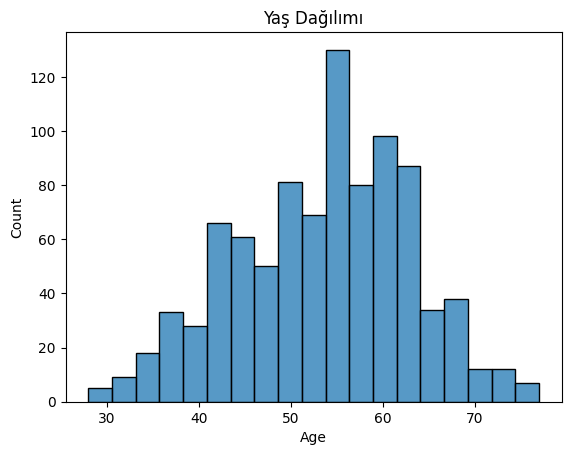

In [5]:
sns.histplot(data['Age'])
plt.title('Yaş Dağılımı')
plt.show()

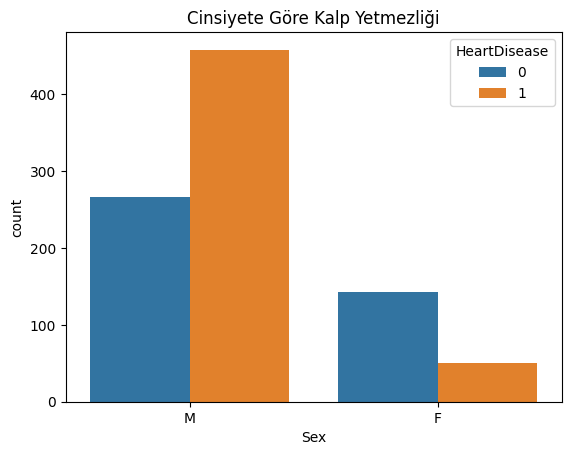

In [6]:
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Cinsiyete Göre Kalp Yetmezliği')
plt.show()

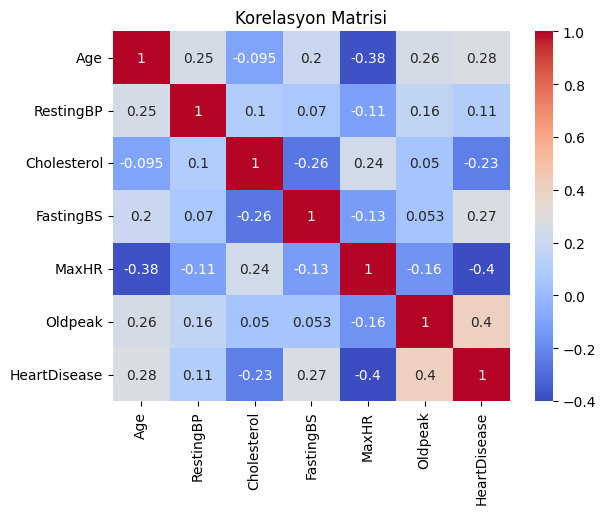

In [7]:
# Korelasyon matrisi (sadece sayısal sütunlar)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


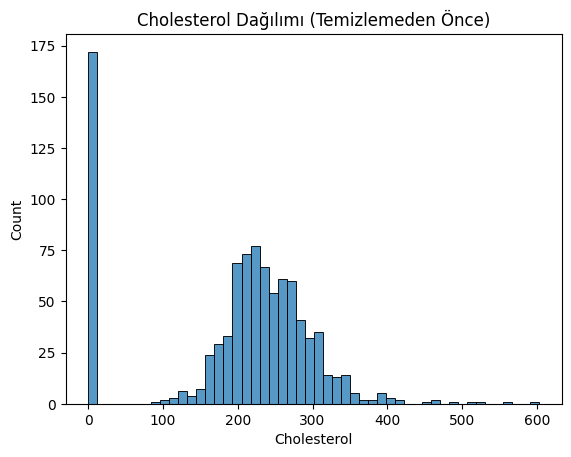

In [8]:
sns.histplot(data['Cholesterol'], bins=50)
plt.title('Cholesterol Dağılımı (Temizlemeden Önce)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


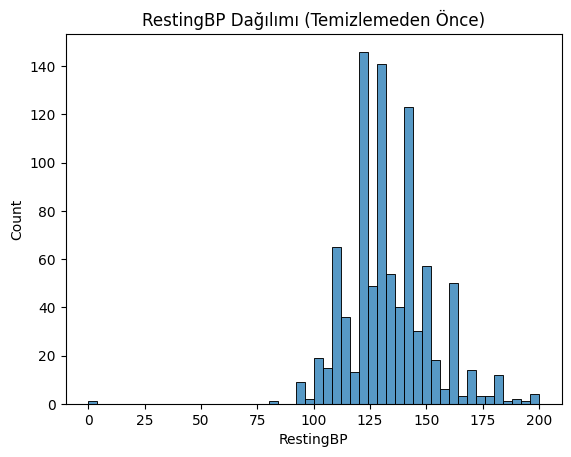

In [9]:
sns.histplot(data['RestingBP'], bins=50)
plt.title('RestingBP Dağılımı (Temizlemeden Önce)')
plt.show()

In [10]:
data.loc[data['Cholesterol'] == 0, 'Cholesterol'] = data['Cholesterol'].median()
data.loc[data['RestingBP'] == 0, 'RestingBP'] = data['RestingBP'].median()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


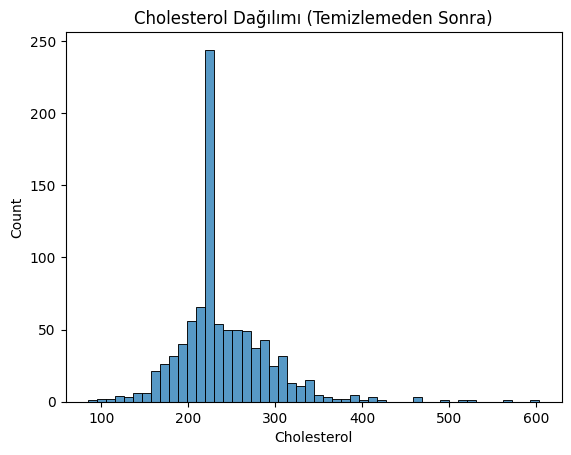

In [11]:
sns.histplot(data['Cholesterol'], bins=50)
plt.title('Cholesterol Dağılımı (Temizlemeden Sonra)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


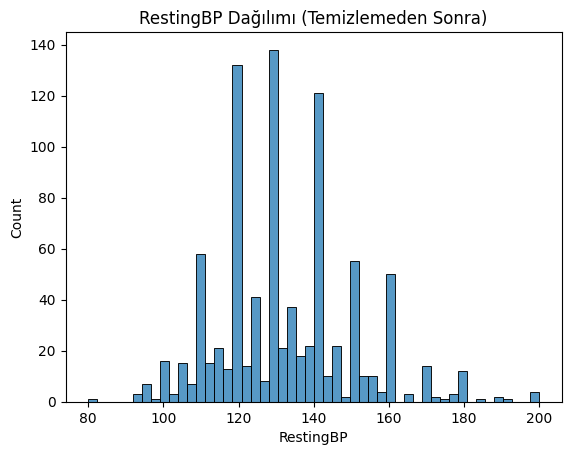

In [12]:
sns.histplot(data['RestingBP'], bins=50)
plt.title('RestingBP Dağılımı (Temizlemeden Sonra)')
plt.show()

In [13]:
# Özellikler ve hedefi ayır
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [14]:
# Eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# CatBoost modelini eğitiyoruz
cat_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, cat_features=cat_features, verbose=0)
model.fit(X_train, y_train)

In [16]:
# Tahmin ve performans
y_pred = model.predict(X_test)
classification_report(y_test, y_pred, output_dict=True)

{'0': {'precision': 0.8354430379746836,
  'recall': 0.8571428571428571,
  'f1-score': 0.846153846153846,
  'support': 77},
 '1': {'precision': 0.8952380952380953,
  'recall': 0.8785046728971962,
  'f1-score': 0.8867924528301887,
  'support': 107},
 'accuracy': 0.8695652173913043,
 'macro avg': {'precision': 0.8653405666063894,
  'recall': 0.8678237650200267,
  'f1-score': 0.8664731494920174,
  'support': 184},
 'weighted avg': {'precision': 0.8702151636659067,
  'recall': 0.8695652173913043,
  'f1-score': 0.8697860793841106,
  'support': 184}}

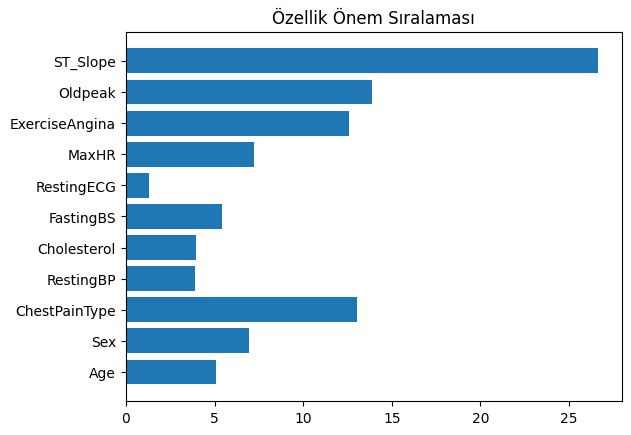

In [17]:
# Özellik önem sıralaması
importances = model.get_feature_importance()
feature_names = X.columns
plt.barh(feature_names, importances)
plt.title('Özellik Önem Sıralaması')
plt.show()

## Project Summary and Work Performed

This notebook uses the [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) to predict heart failure risk based on clinical features (age, sex, cholesterol, etc.). The goal is to classify patients as having heart failure (1) or not (0).

### Work Performed:
1. **Exploratory Data Analysis (EDA)**:
   - Examined dataset structure; no missing values found.
   - Visualized distributions of numerical features (e.g., `Age`, `Cholesterol`) using histograms.
   - Analyzed relationships between categorical features (e.g., `Sex`, `ChestPainType`) and the target using bar plots.
   - Displayed correlations among numerical features with a heatmap.

2. **Data Cleaning**:
   - Replaced zero values in `Cholesterol` and `RestingBP` with their respective medians.
   - Verified cleaning by comparing histograms before and after.

3. **Modeling**:
   - Applied CatBoost, leveraging its ability to handle categorical features (`Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`) natively.
   - Split data into 80% training and 20% testing sets.
   - Trained the model with 100 iterations, depth 6, and learning rate 0.1.

4. **Evaluation and Visualization**:
   - Evaluated model performance using accuracy, precision, recall, and F1-score.
   - Visualized feature importance to identify key predictors (e.g., `Oldpeak`, `ST_Slope`).

### Conclusion:
This project demonstrates a comprehensive approach to heart failure prediction through data preprocessing, visualization, and machine learning. CatBoost delivered strong performance on categorical data. Future improvements could include hyperparameter tuning and additional feature engineering.